# Tests for Portfolio VaR Functions

In [1]:
import pandas as pd
import portfolio_var as pv
import plots as pl
import data_download as dd

### Asset Normal/ Undiversified VaR

**NOTE**: since we already have the parametric VaR, a Portfolio-Normal VaR function is redundant. Portfolio-Normal is exactly like parametric VaR (which we have), and that can be backtested and ES can be done (add note about that).

In [2]:
# Define shares directly (tickers inferred from index)
shares = pd.Series({
    "AAPL": 10,
    "MSFT": 9,
    "NVDA": 80,
    "GOOGL": 6,
    "JPM": -9
})

# Download prices for the tickers in 'shares'
tickers = shares.index.tolist()
prices = dd.get_raw_prices(tickers, start="2024-01-01")

# Convert prices to base currency (e.g. CHF)
prices_converted = dd.convert_to_base(prices, base="CHF")

# Create portfolio with monetary positions
position_data = dd.create_portfolio(prices_converted, shares)

# Compute returns and summary stats
returns, mean_returns, covariance_matrix = dd.summary_statistics(position_data)

# Display
final_value = position_data.sum(axis=1).iloc[-1]
print(f"\nPortfolio final value in CHF: {final_value:.2f}")
print("\nSample of daily returns:\n", returns.head())
print("\nMean returns (daily, in CHF):\n", mean_returns)
print("\nCovariance matrix (in CHF):\n", covariance_matrix)


[currency detection] AAPL: USD
[currency detection] GOOGL: USD
[currency detection] JPM: USD
[currency detection] MSFT: USD
[currency detection] NVDA: USD
[fx download] Downloading FX pairs: CHFUSD=X
[conversion] AAPL: USD → CHF via CHFUSD=X
[conversion] GOOGL: USD → CHF via CHFUSD=X
[conversion] JPM: USD → CHF via CHFUSD=X
[conversion] MSFT: USD → CHF via CHFUSD=X
[conversion] NVDA: USD → CHF via CHFUSD=X

Portfolio final value in CHF: 13064.78

Sample of daily returns:
                 AAPL     GOOGL       JPM      MSFT      NVDA
Date                                                        
2024-01-03  0.002215  0.015257  0.005375  0.009041 -0.002782
2024-01-04 -0.014117 -0.019621  0.005192 -0.008602  0.007570
2024-01-05 -0.002722 -0.003549  0.006319  0.000779  0.024222
2024-01-08  0.025054  0.023792 -0.000594  0.019747  0.065195
2024-01-09 -0.005582  0.011820 -0.011206 -0.000401  0.013592

Mean returns (daily, in CHF):
 AAPL     0.000524
GOOGL    0.000732
JPM      0.001471
MSFT     0

In [3]:
# Set parameters
confidence_level = 0.99
holding_period = 1

In [4]:
position_data.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-02,1551.522630,694.622688,-1259.144120,2778.545632,3242.954747
2024-01-03,1554.959145,705.220497,-1265.911507,2803.665191,3233.934430
2024-01-04,1533.007607,691.383324,-1272.483602,2779.547063,3258.416930
2024-01-05,1528.834220,688.929295,-1280.525050,2781.711338,3337.342530
2024-01-08,1567.138126,705.320088,-1279.764691,2836.640769,3554.920549


In [5]:
# Compute and display the summary
summary_df = pv.asset_normal_var(position_data=position_data,
                                 confidence_level=confidence_level,
                                 holding_period=holding_period)

In [6]:
summary_df.head(-10)

,Diversified_VaR,Undiversified_VaR,Diversification_Benefit
Date,,,
2024-01-03,386.572220,432.361256,45.789036
2024-01-04,386.723566,431.615477,44.891911
2024-01-05,392.770382,437.756919,44.986537
2024-01-08,413.199343,460.805281,47.605938
2024-01-09,417.188921,465.427481,48.238560
...,...,...,...
2025-04-29,710.453156,759.534097,49.080941
2025-04-30,712.145661,761.542250,49.396589
2025-05-01,735.137048,787.509595,52.372547


### Marginal VaR

In [7]:
# Compute and display Marginal VaR (styled table)
marginal_df = pv.marginal_var(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)


In [8]:
marginal_df.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-03,0.027884,0.029277,0.011431,0.028968,0.079105
2024-01-04,0.027736,0.029154,0.011358,0.028876,0.079253
2024-01-05,0.027571,0.029031,0.011337,0.028767,0.079439
2024-01-08,0.027367,0.028877,0.011467,0.028603,0.079743
2024-01-09,0.027278,0.028850,0.011522,0.028555,0.079846


### Incremental, Component and Relative Component VaR

In [9]:
# Compute and display Component VaR (styled table)
component_df = pv.component_var(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)

In [10]:
component_df.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-03,43.359192,20.646389,-14.470179,81.215782,255.821036
2024-01-04,42.518810,20.156852,-14.452353,80.261839,258.238417
2024-01-05,42.151400,20.000333,-14.517492,80.020130,265.116011
2024-01-08,42.887924,20.367826,-14.674508,81.137527,283.480575
2024-01-09,42.510031,20.589362,-14.580622,80.966736,287.703415


In [11]:
rcvar_df = pv.relative_component_var(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)


In [12]:
rcvar_df.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-03,0.112163,0.053409,-0.037432,0.210092,0.661768
2024-01-04,0.109946,0.052122,-0.037371,0.207543,0.667760
2024-01-05,0.107318,0.050921,-0.036962,0.203733,0.674990
2024-01-08,0.103795,0.049293,-0.035514,0.196364,0.686063
2024-01-09,0.101896,0.049353,-0.034950,0.194077,0.689624


In [13]:
# Define change in position
change_vector = [0,10000,0,0,0]  

# Compute and display Incremental VaR
ivar_series = pv.incremental_var(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=confidence_level,
    holding_period=holding_period,
)

In [14]:
ivar_series.head()

Date
2024-01-03    292.765012
2024-01-04    291.543796
2024-01-05    290.310392
2024-01-08    288.774217
2024-01-09    288.504949
dtype: float64

## ES Test

In [15]:
# Compute and display Marginal VaR (styled table)
marginal_es_df = pv.marginal_es(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)


In [16]:
marginal_es_df.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-03,0.031946,0.033541,0.013096,0.033187,0.090628
2024-01-04,0.031776,0.033401,0.013012,0.033082,0.090797
2024-01-05,0.031587,0.033260,0.012989,0.032957,0.091011
2024-01-08,0.031353,0.033084,0.013137,0.032770,0.091359
2024-01-09,0.031252,0.033053,0.013201,0.032714,0.091476


In [17]:
# Compute and display Component VaR (styled table)
component_es_df = pv.component_es(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)

In [18]:
component_es_df.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-03,49.675088,23.653835,-16.577971,93.046040,293.085085
2024-01-04,48.712292,23.092990,-16.557548,91.953142,295.854592
2024-01-05,48.291363,22.913672,-16.632175,91.676224,303.734008
2024-01-08,49.135173,23.334695,-16.812063,92.956386,324.773637
2024-01-09,48.702234,23.588501,-16.704501,92.760717,329.611594


In [19]:
res_df = pv.relative_component_es(
    position_data=position_data,
    confidence_level=confidence_level,
    holding_period=holding_period,
)


In [20]:
res_df.head()

,AAPL,GOOGL,JPM,MSFT,NVDA
Date,,,,,
2024-01-03,0.112163,0.053409,-0.037432,0.210092,0.661768
2024-01-04,0.109946,0.052122,-0.037371,0.207543,0.667760
2024-01-05,0.107318,0.050921,-0.036962,0.203733,0.674990
2024-01-08,0.103795,0.049293,-0.035514,0.196364,0.686063
2024-01-09,0.101896,0.049353,-0.034950,0.194077,0.689624


In [21]:
# Define change in position
change_vector = [0,10000,0,0,0]  

# Compute and display Incremental VaR
ies_series = pv.incremental_es(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=confidence_level,
    holding_period=holding_period,
)

In [22]:
ies_series.head()

Date
2024-01-03    335.410487
2024-01-04    334.011383
2024-01-05    332.598316
2024-01-08    330.838375
2024-01-09    330.529884
dtype: float64

### Visualizations


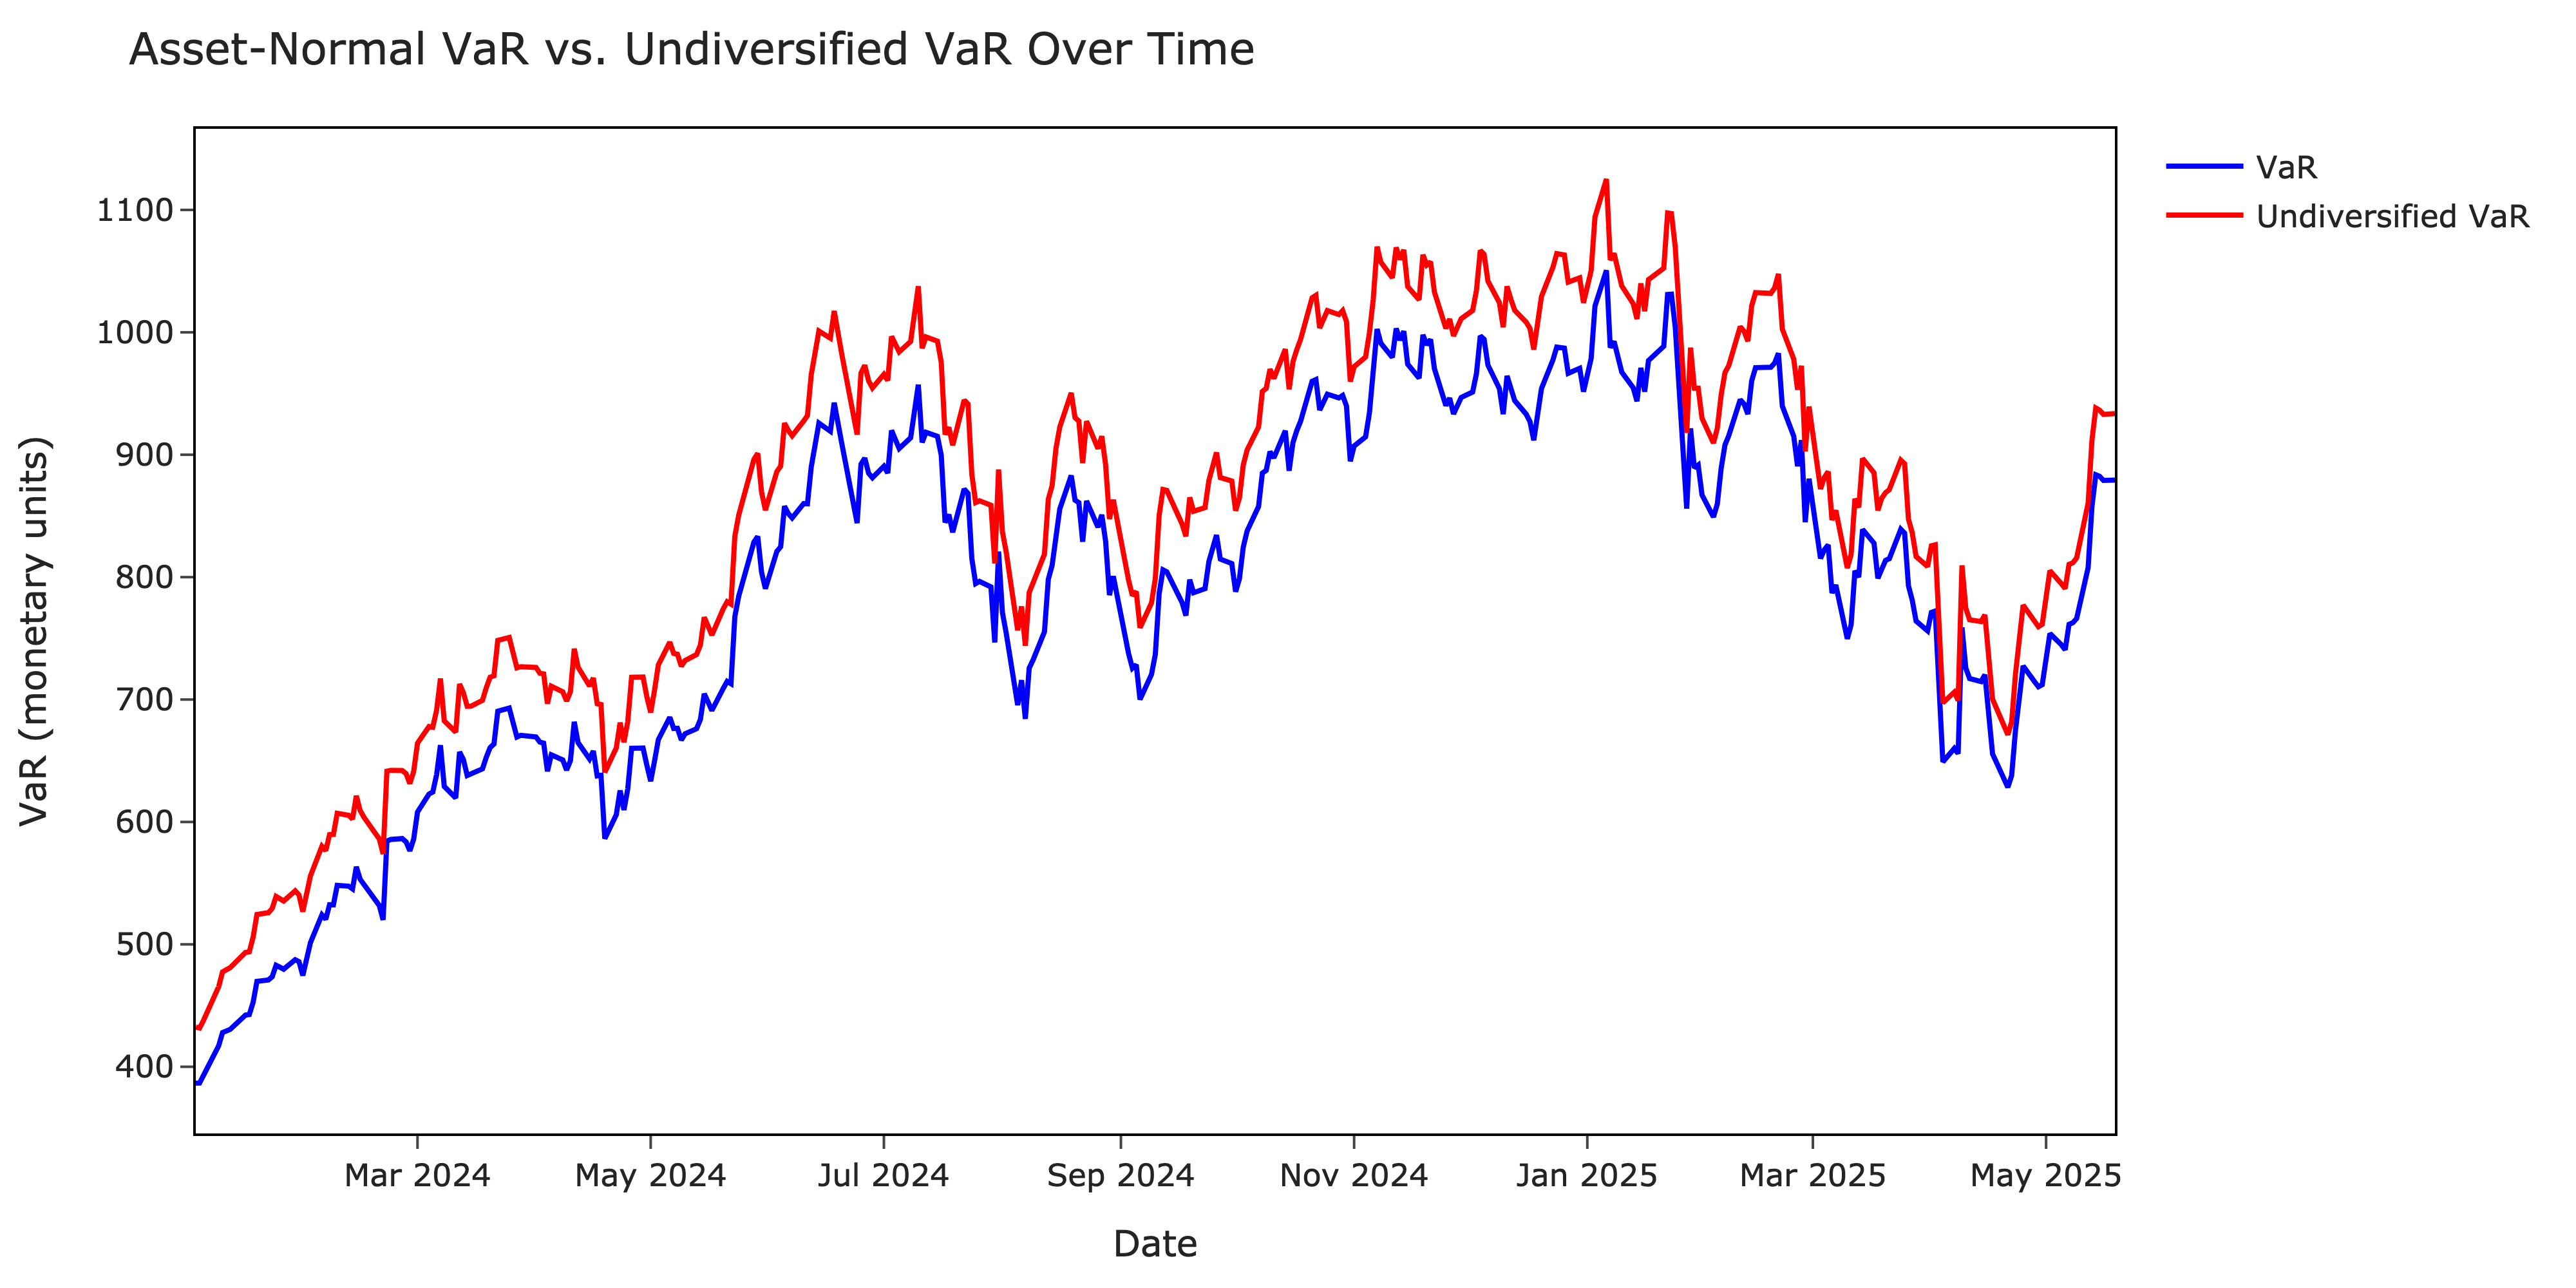

In [23]:
pl.plot_var_series(summary_df, interactive=False)


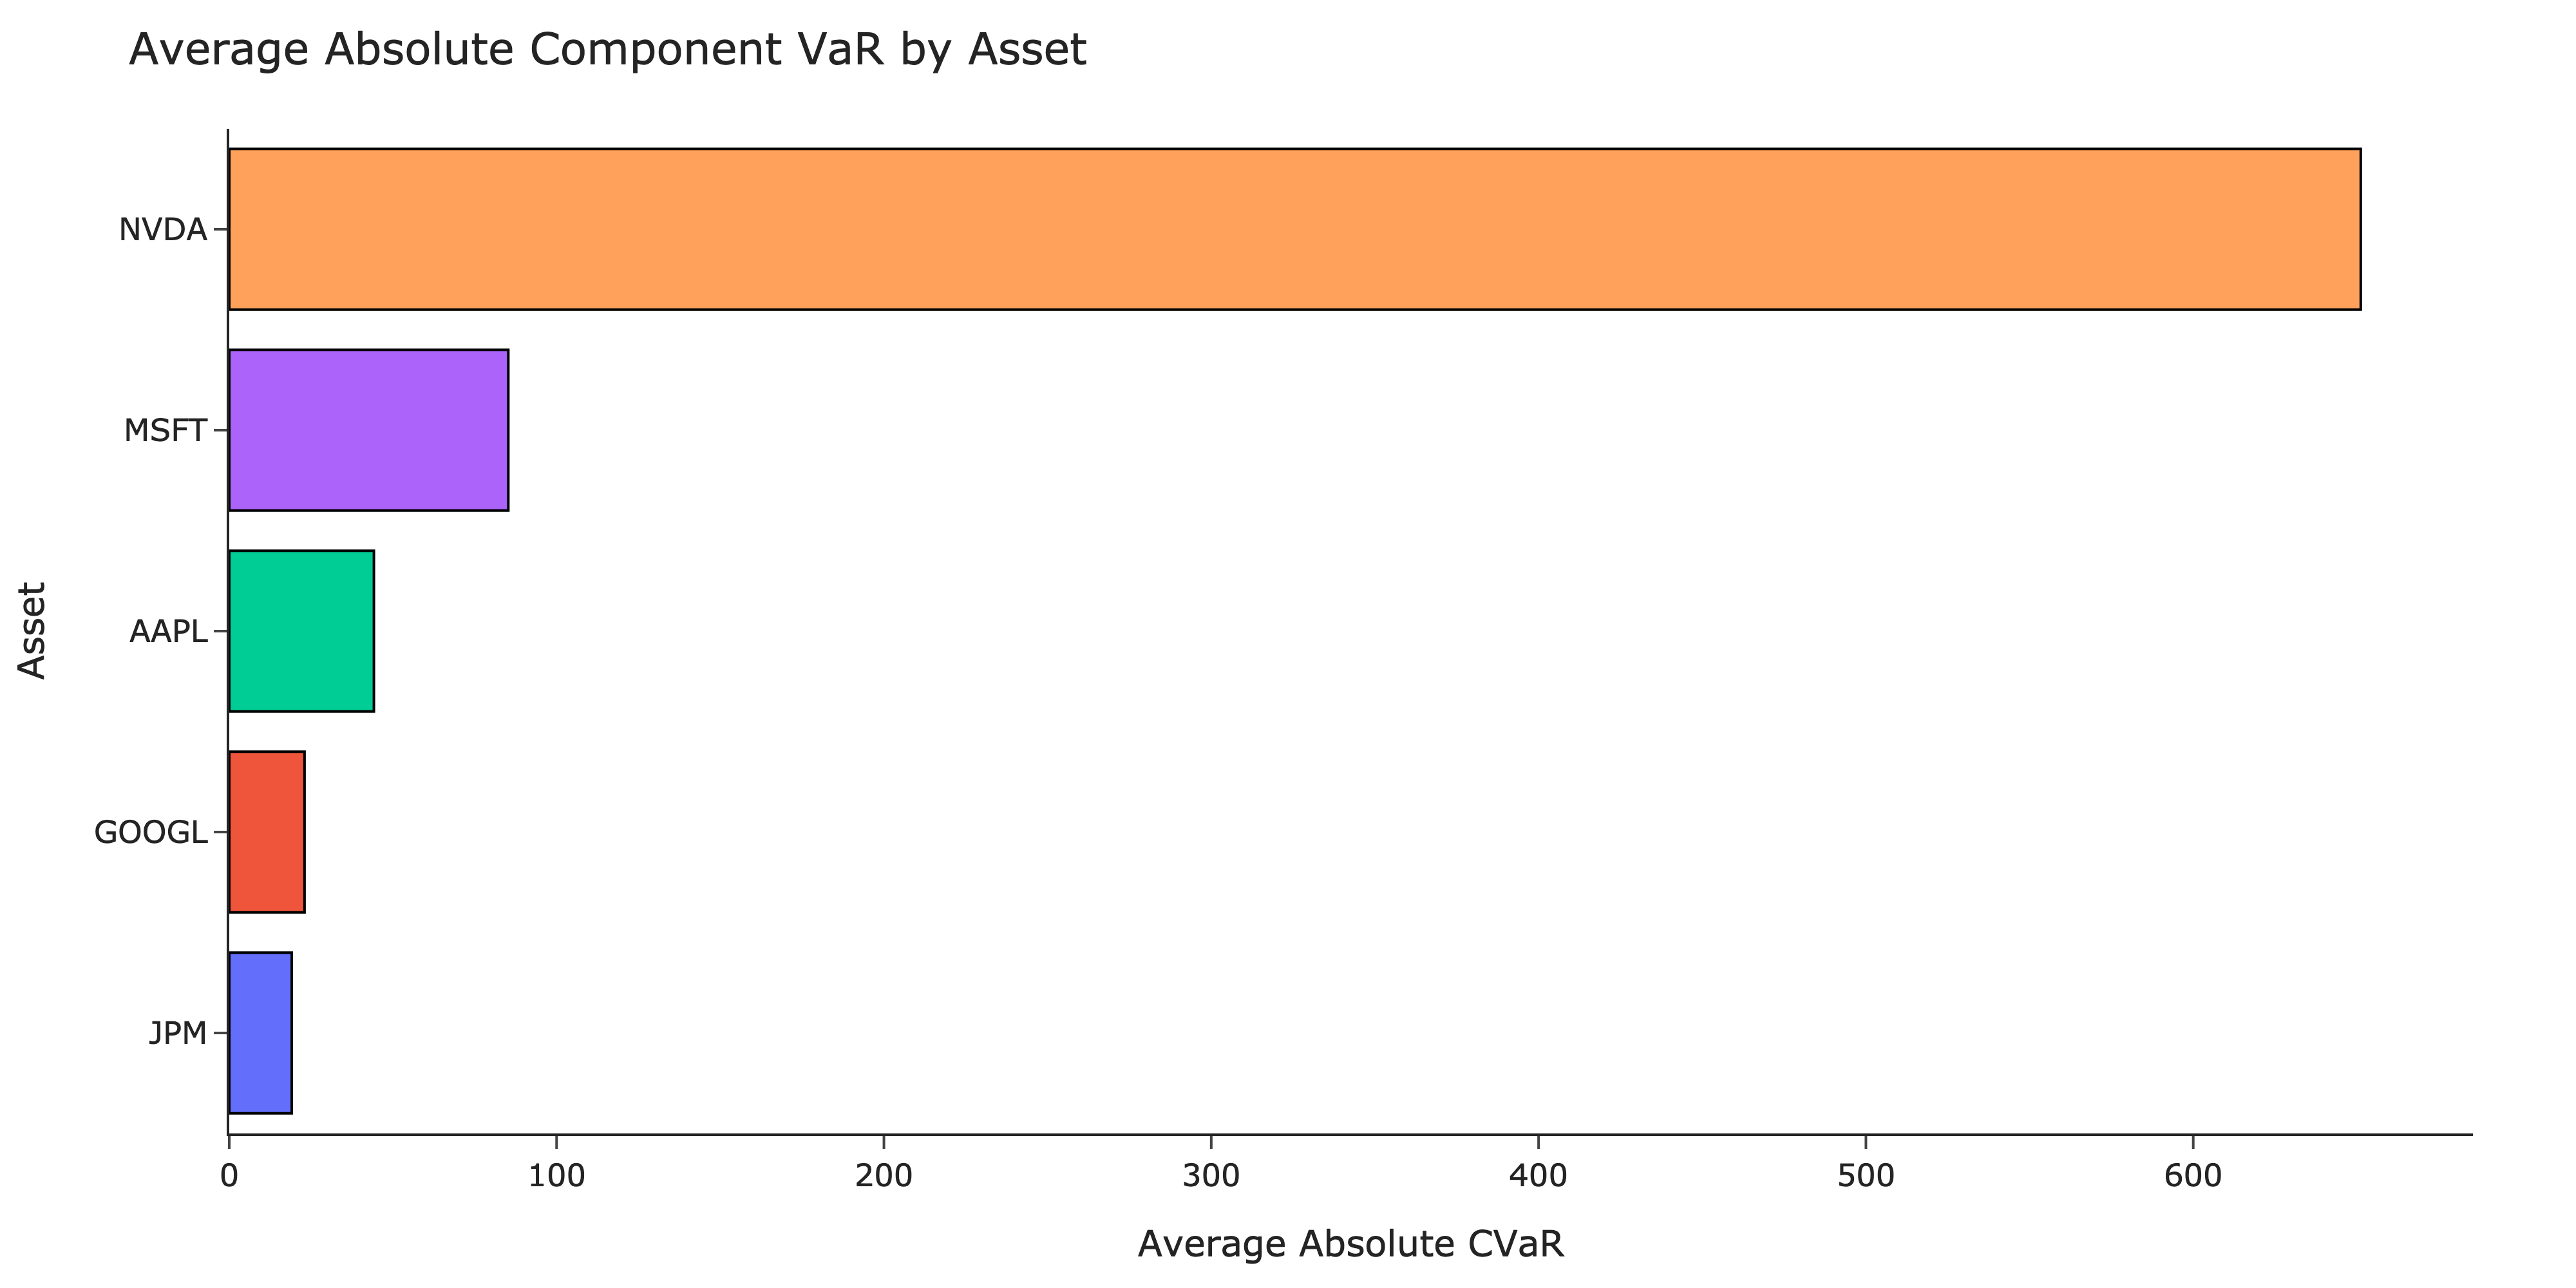

In [24]:
pl.plot_risk_contribution_bar(component_df, interactive=False)


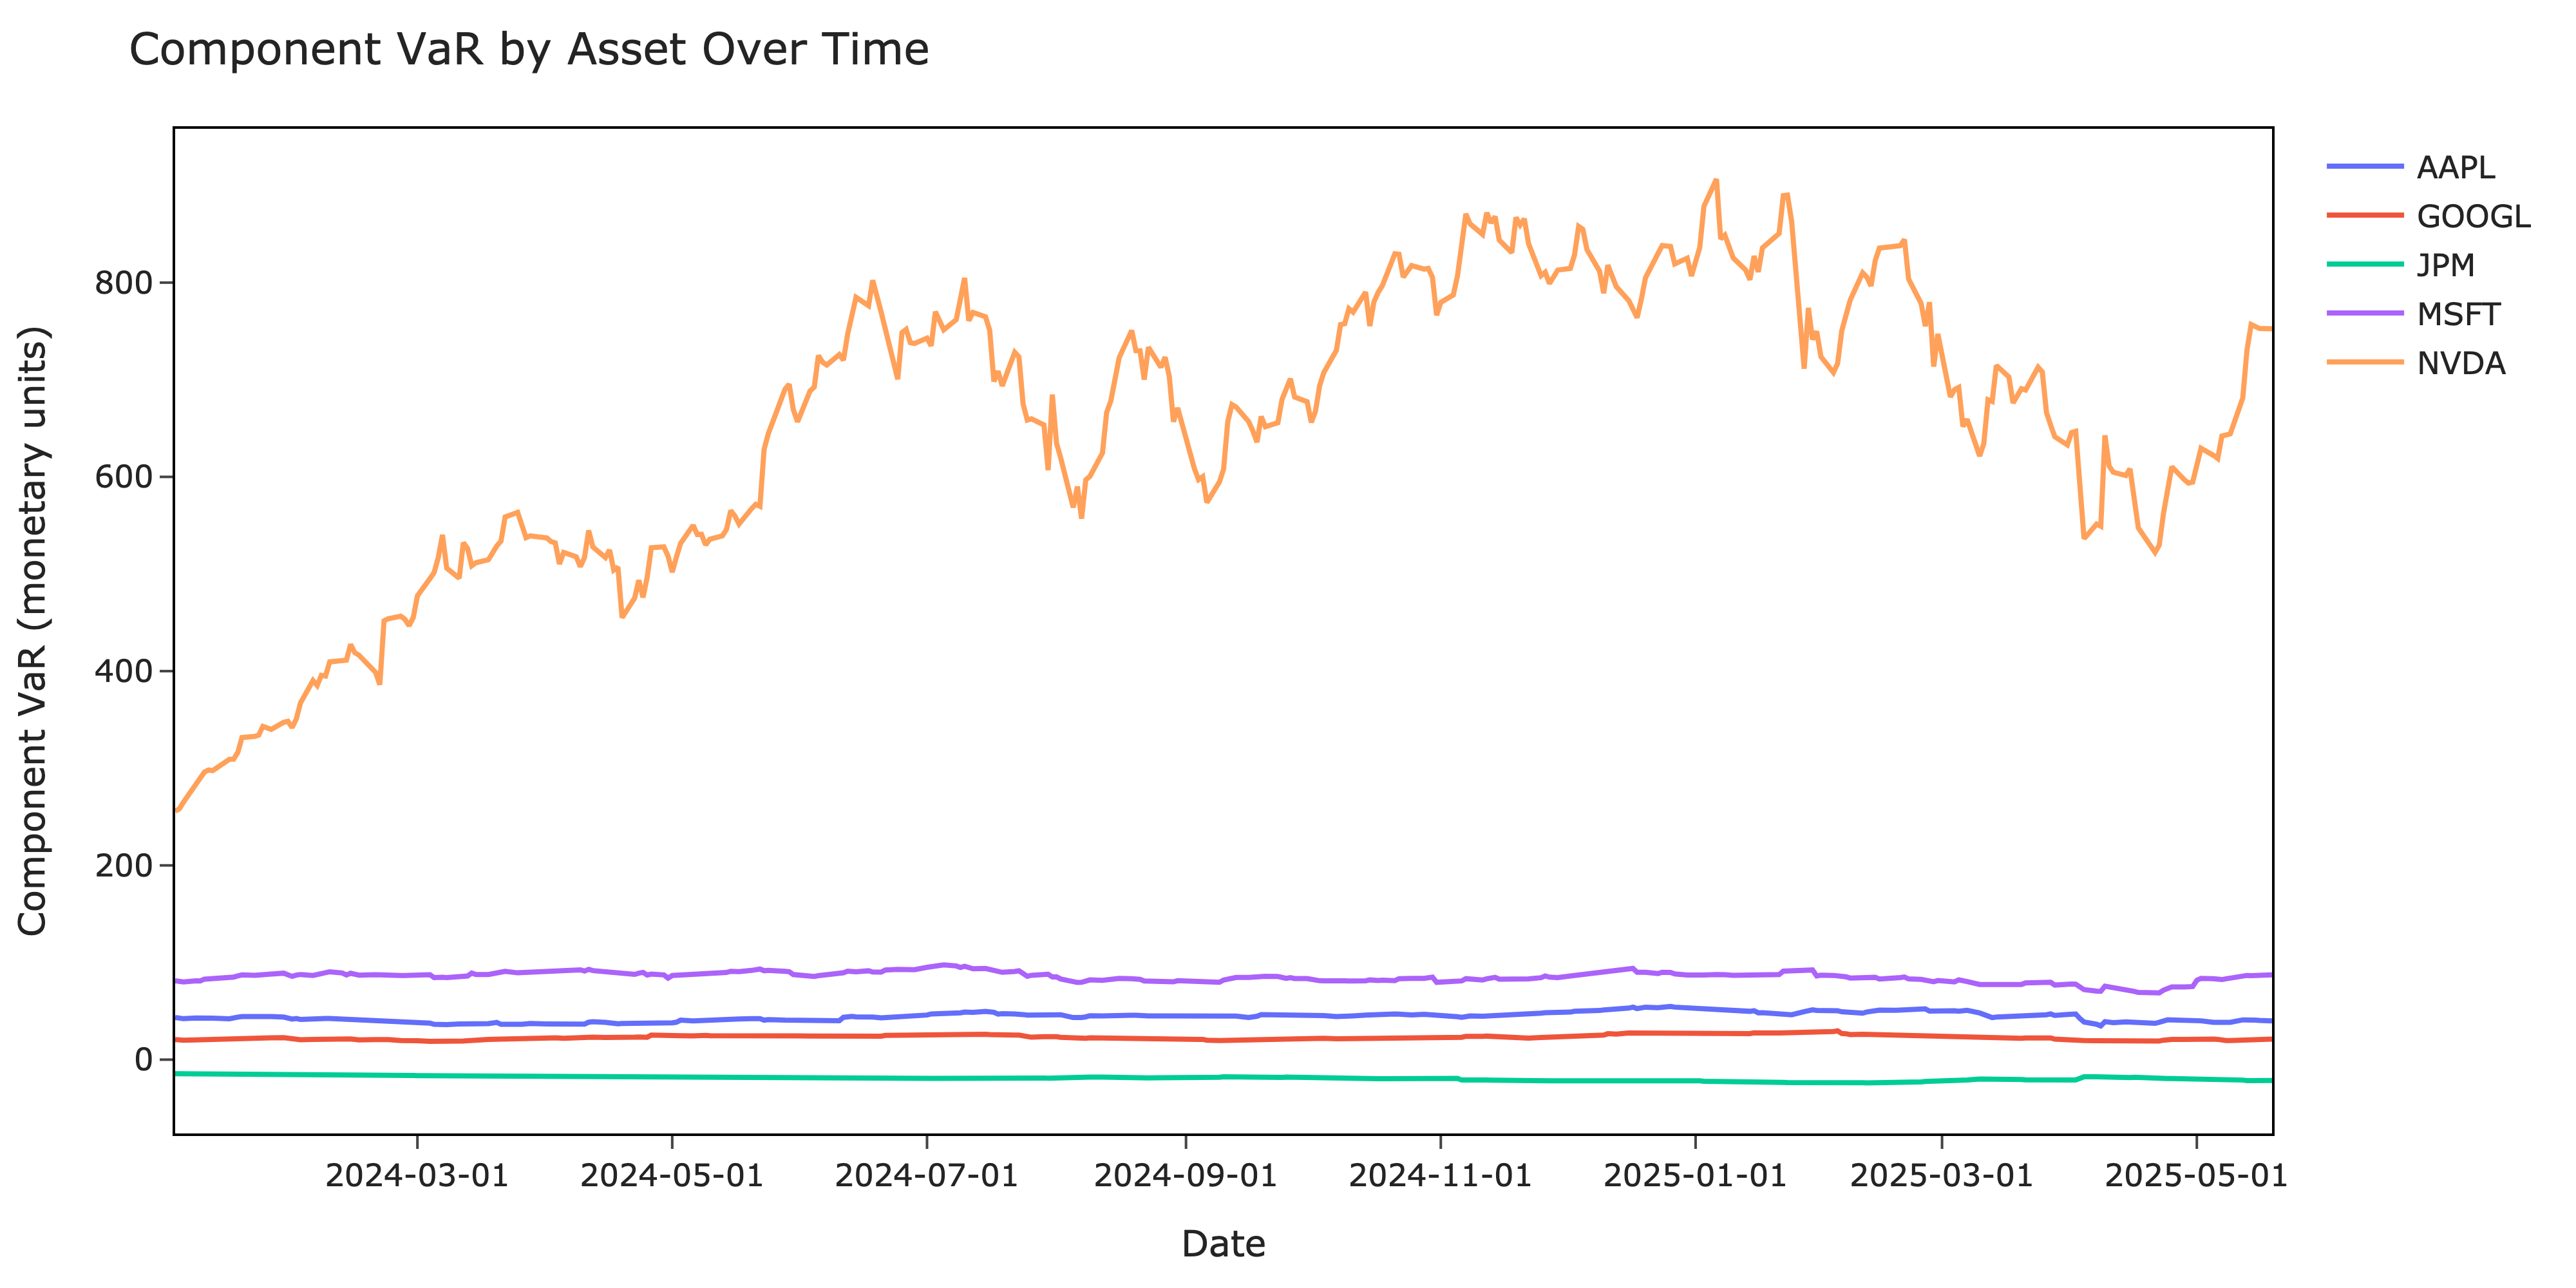

In [25]:
pl.plot_risk_contribution_lines(component_df, interactive=False)


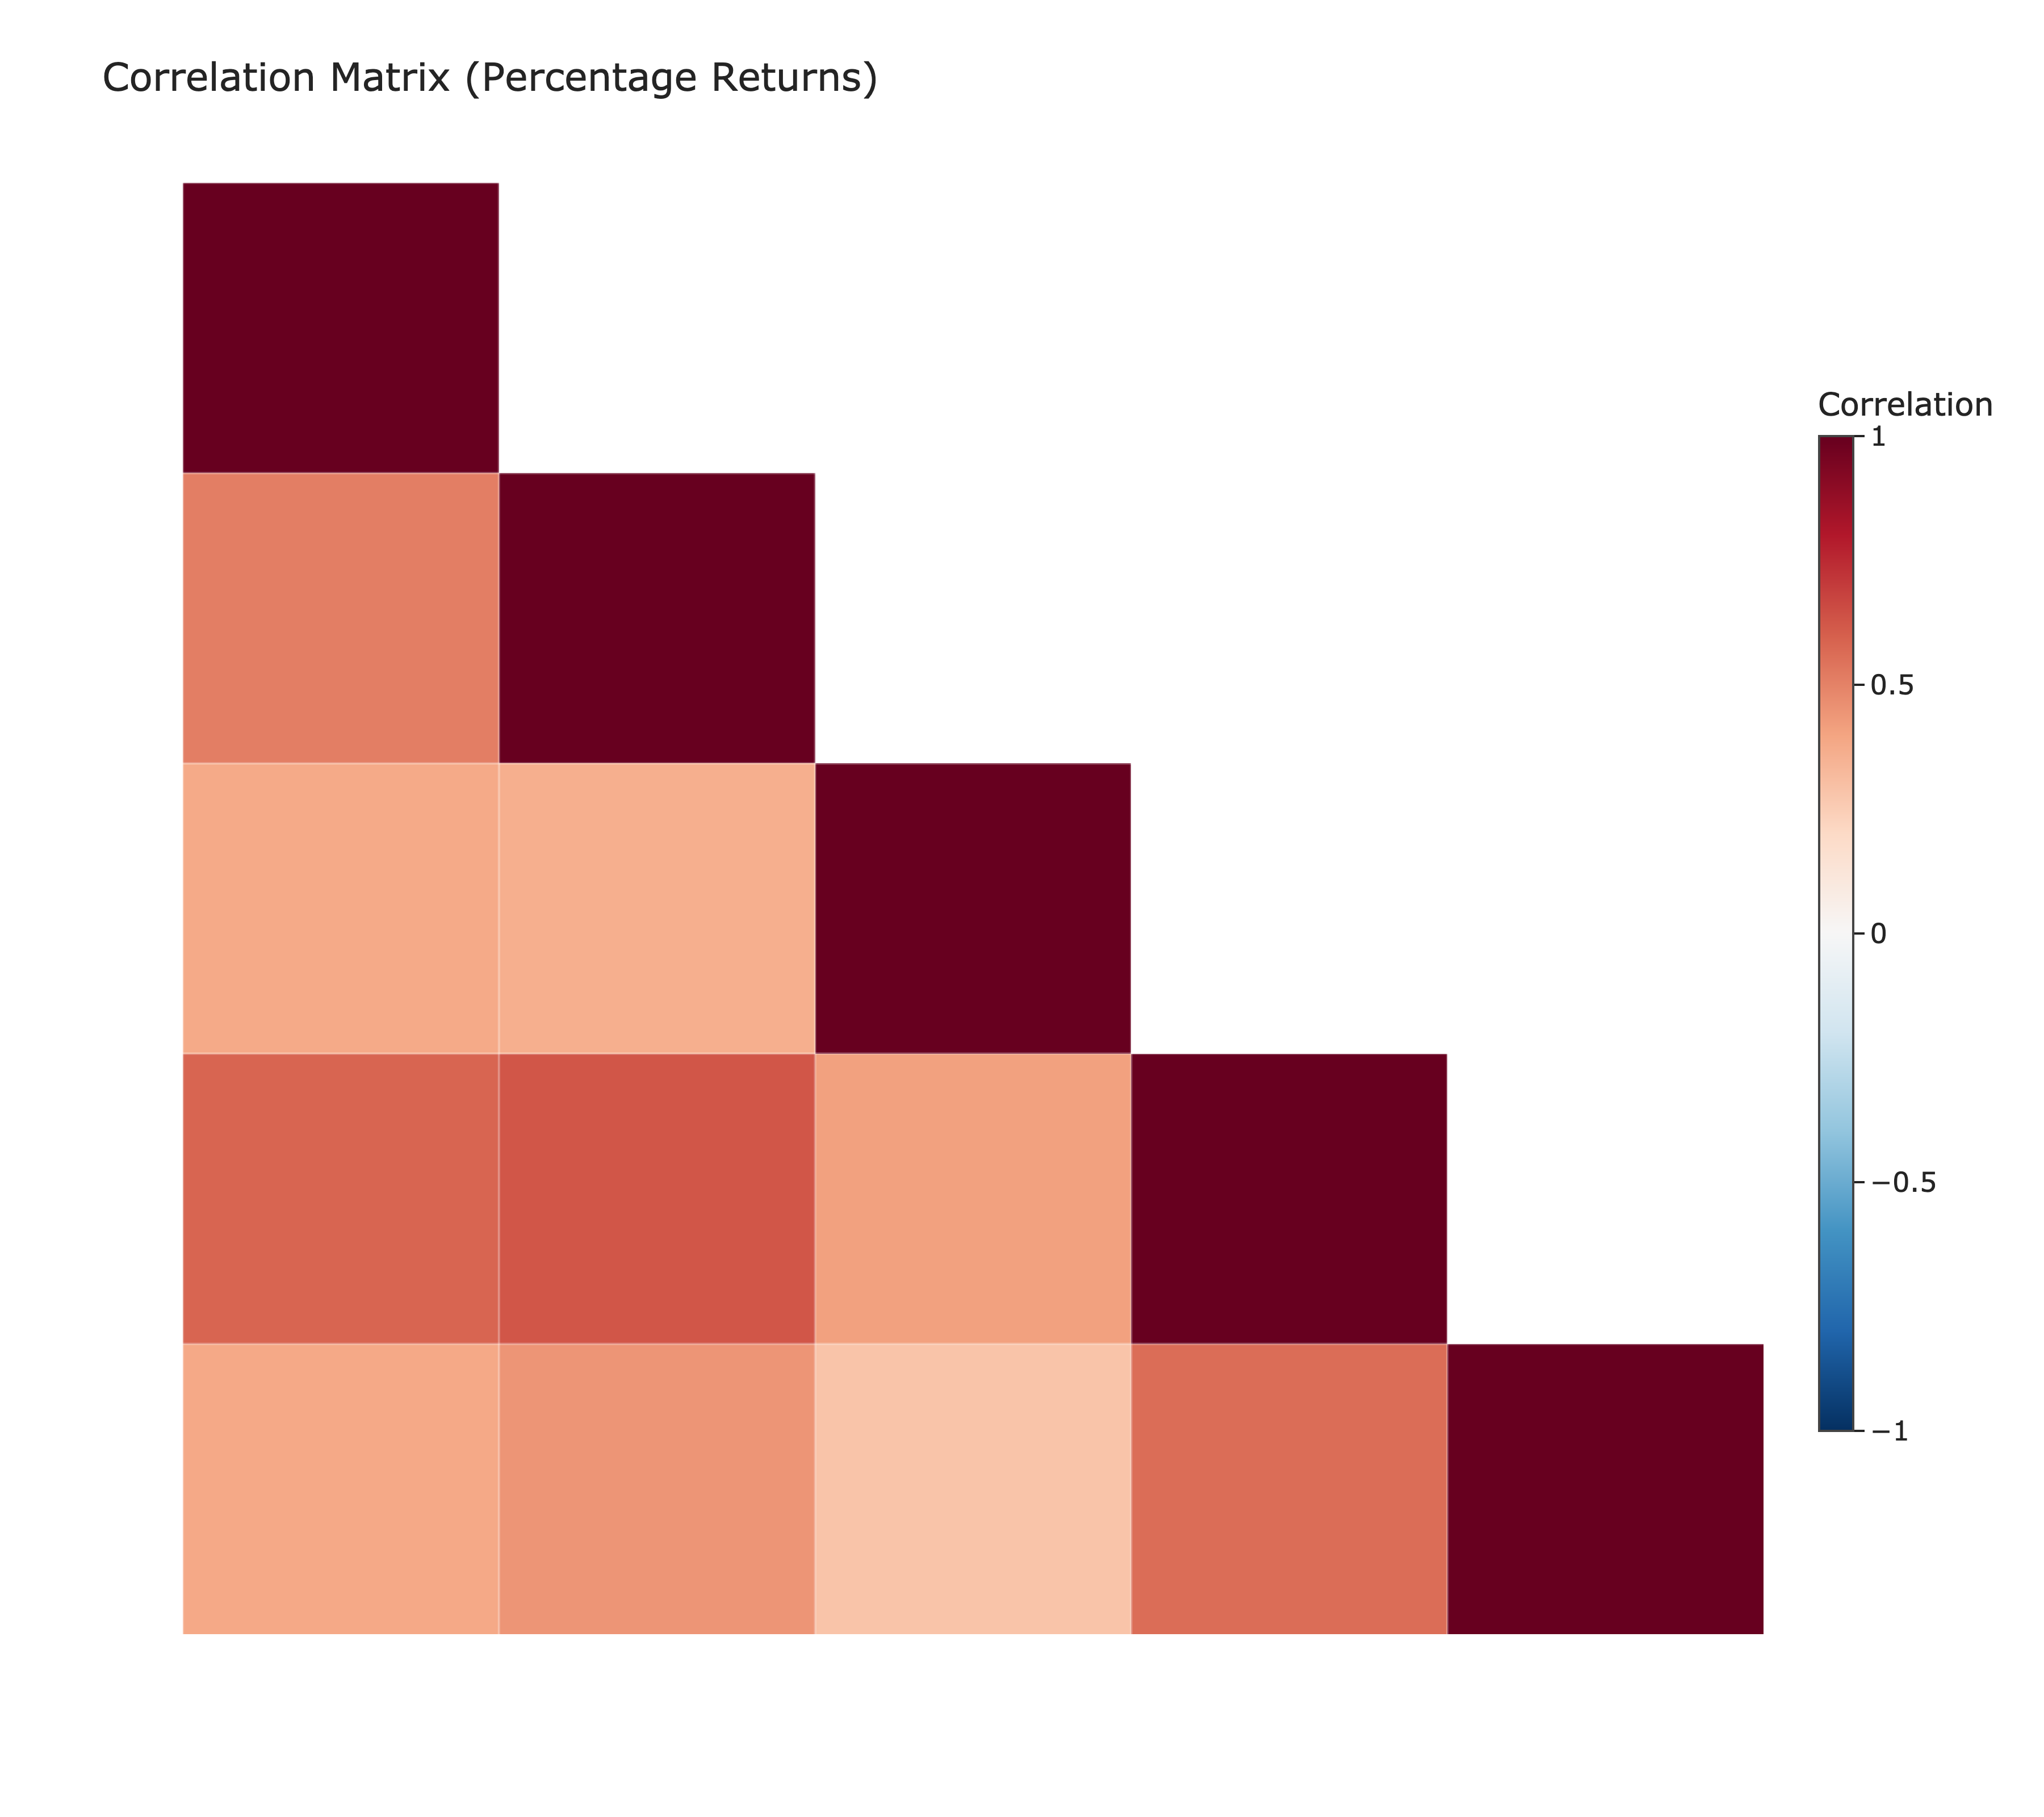

In [26]:
pl.plot_correlation_matrix(position_data, interactive=False)

---
### Appendix

- **Asset-Normal VaR (AN VaR)**  
  $$
  \text{VaR}_t = z_\alpha \cdot \sqrt{x_t^\top \Sigma x_t} \cdot \sqrt{h}
  $$

- **Undiversified VaR (UVaR)**  
  $$
  \text{UVaR}_t = z_\alpha \cdot \sum_{i=1}^N \sigma_i x_{i,t} \cdot \sqrt{h}
  $$

- **Marginal VaR**  
  $$
  \Delta \text{VaR}_{i,t} = \text{VaR}_t \cdot \frac{(\Sigma x_t)_i}{x_t^\top \Sigma x_t}
  $$

- **Component VaR**  
  $$
  \text{CVaR}_{i,t} = x_{i,t} \cdot \Delta \text{VaR}_{i,t}
  $$

- **Relative Component VaR**  
  $$
  \text{RCVaR}_{i,t} = \frac{\text{CVaR}_{i,t}}{\text{VaR}_t}
  $$

- **Incremental VaR**  
  $$
  \text{IVaR}_t = \Delta \text{VaR}_t^\top \cdot a
  $$

---

### Function Dependencies

```text
var_asset_normal()
 └── marginal_var()
      ├── component_var()
      │     └── relative_component_var()
      └── incremental_var()
```

---

### Notes
- All risk measures are in **monetary terms**.
- Covariance is based on returns inferred from time series of holdings.
- Inputs: matrix of monetary holdings, confidence level $z_\alpha$, and horizon $h$.